
Cluster 1 data points:
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
101  102            5.8           2.7            5.1           1.9   
102  103            7.1           3.0            5.9           2.1   
103  104            6.3           2.9            5.6           1.8   
104  105            6.5           3.0            5.8           2.2   
105  106            7.6           3.0            6.6           2.1   
106  107            4.9           2.5            4.5           1.7   
107  108            7.3           2.9            6.3           1.8   
108  109            6.7           2.5            5.8           1.8   
109  110            7.2           3.6            6.1           2.5   
110  111            6.5           3.2            5.1           2.0   
111  112            6.4           2.7            5.3           1.9   
112  113            6.8           3.0            5.5           2.1   
113  114            5.7           2.5            5.0           2.0

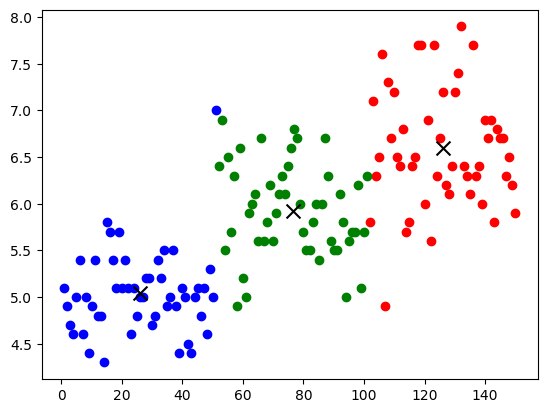

<class 'NameError'>: name 'features' is not defined

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def distance(point1, point2):
  return np.sqrt(np.sum((point1 - point2) ** 2))

def kmeans(data, k, max_iterations):
  centroids = data[np.random.choice(len(data), k, replace=False)]
  assignments = np.zeros(len(data))
  for _ in range(max_iterations):
    for i, point in enumerate(data):
      distances_to_centroids = [distance(point, centroid) for centroid in centroids]
      assignments[i] = np.argmin(distances_to_centroids)

    for cluster in range(k):
      cluster_data = data[assignments == cluster]
      if len(cluster_data) > 0:  # Avoid division by zero
        centroids[cluster] = np.mean(cluster_data, axis=0)

  return centroids, assignments

data = pd.read_csv("Iris.csv")

#features = list(data.columns)[:-1]
#X = data[features].to_numpy()
X = data.iloc[:, :-1].values
k = 3
max_iterations = 100

centroids, assignments = kmeans(X, k, max_iterations)

clustered_data = []
for i in range(k):
  clustered_data.append(X[assignments == i])

for i in range(k):
  print(f"\nCluster {i+1} data points:")
  print(data.iloc[assignments == i])

colors = ['red', 'green', 'blue'] 
for i in range(k):
  plt.scatter(clustered_data[i][:, 0], clustered_data[i][:, 1], c=colors[i], label=f"Cluster {i+1}")

plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='black', label='Centroids')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title(f"K-Means Clustering (k={k})")
plt.legend()
plt.show()
